The **self assessment data-1** dataset contains data which is unlabeled. So, this is certain that no supervised learning technique can be applied. We can apply unsupervised learning technique such as, k-means clustering for analyzing the data to discover useful patterns from it.

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv("/content/self assessment data-1.csv")
data

,a,b
0,10.9,12.6
1,2.3,8.4
2,8.4,12.6
3,12.1,16.2
4,7.3,8.9
5,23.4,11.3
6,19.7,18.5
7,17.1,17.2
8,3.2,3.4
9,1.3,22.8


In [ ]:
unlabeled_data=data.iloc[:,:2]
unlabeled_data

,a,b
0,10.9,12.6
1,2.3,8.4
2,8.4,12.6
3,12.1,16.2
4,7.3,8.9
5,23.4,11.3
6,19.7,18.5
7,17.1,17.2
8,3.2,3.4
9,1.3,22.8


In [ ]:
features_value = unlabeled_data.values
features_value

array([[10.9, 12.6],
       [ 2.3,  8.4],
       [ 8.4, 12.6],
       [12.1, 16.2],
       [ 7.3,  8.9],
       [23.4, 11.3],
       [19.7, 18.5],
       [17.1, 17.2],
       [ 3.2,  3.4],
       [ 1.3, 22.8],
       [ 2.4,  6.9],
       [ 2.4,  7.1],
       [ 3.1,  8.3],
       [ 2.9,  6.9],
       [11.2,  4.4],
       [ 8.3,  8.7],
       [ 1.2, 19.5],
       [ 0.5, 20. ]])

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial import distance
inertia = []
K = range(1,7)
distortions = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features_value)
    inertia.append(km.inertia_)
    distortions.append(sum(np.min(distance.cdist(features_value, km.cluster_centers_, 'euclidean'),axis=1)) /
    features_value.shape[0])

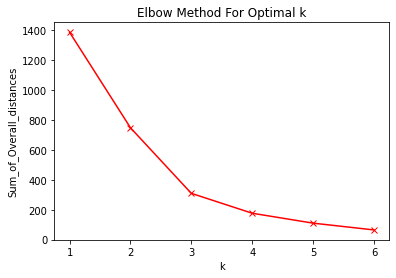

In [ ]:
plt.plot(K, inertia, 'rx-')
plt.xlabel('k')
plt.ylabel('Sum_of_Overall_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
!pip install kneed

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 7), inertia, curve="convex", direction="decreasing")
kl.elbow

3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features_value)

Myclusters = kmeans.predict(features_value)
Myclusters 

array([1, 2, 2, 1, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [ ]:
unlabeled_data['cluster'] = Myclusters
unlabeled_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,a,b,cluster
0,10.9,12.6,1
1,2.3,8.4,2
2,8.4,12.6,2
3,12.1,16.2,1
4,7.3,8.9,2
5,23.4,11.3,1
6,19.7,18.5,1
7,17.1,17.2,1
8,3.2,3.4,2
9,1.3,22.8,0


In [ ]:
centers = np.array(kmeans.cluster_centers_)
centers
centroid = pd.DataFrame(centers)
centroid

,0,1
0,1.00,20.766667
1,16.64,15.160000
2,5.15,7.560000


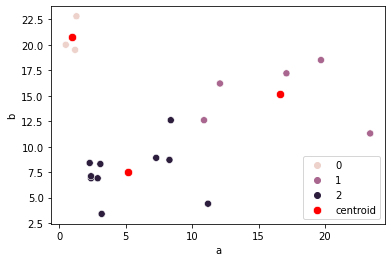

In [ ]:
sns.scatterplot(x = unlabeled_data['a'], y = unlabeled_data['b'], s = 50, c = unlabeled_data['cluster'], marker = "o", hue = unlabeled_data['cluster'])
sns.scatterplot(x = centers[:,0], y = centers[:,1], marker="o", color='r', s = 70, label="centroid")